<a href="https://colab.research.google.com/github/pedrowillianprestes/portfolio/blob/main/Analisando_os_Dados_do_Airbnb_Lisboa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - Lisboa, Portugal.

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Lisboa, e ver quais insights podem ser extraídos a partir de dados brutos.**

# <center> Breve Introdução sobre a Cidade de Lisboa<center>

<center><img alt="Dublin" width="75%" src="https://github.com/pedrowillianprestes/sigmoidal_data_science/blob/main/foto-lisboa.jpg?raw=true"></center>

A cidade de Lisboa pode ser considerada como uma cidade global devido a sua relevância em aspectos econômicos, turísticos e educacionais. 

Pode ser considerada o maior centro econômico do continente europeu em função do maior porto da costa atlântica da Europa e o aeroporto Humberto Delgado, que recebe cerca de 20 milhões de pessoas anualmente.

A Travelbook, a maior publicação digital de viagens da Alemanha, escolheu Lisboa como o melhor destino na categoria “cidades” pelo seu “desenvolvimento positivo” na área da sustentabilidade e pelas “muitas atrações e atividades” em 2022.

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Lisboa (good for visualisations).*

Importante: O portal está em constante evolução, e em determinado momento, pode ser que o [conjunto de dados](http://data.insideairbnb.com/portugal/lisbon/lisbon/2022-09-13/visualisations/listings.csv) exato utilizado nesse notebook não esteja mais disponível, o que quebraria nosso código.

Pensando nisso, disponibilizamos [aqui](https://www.dropbox.com/s/15i4eztx1uef09a/lisboa.csv?dl=1) o conjunto que utilizamos, para que você sempre consiga utilizar esse material.

Com isso em mente, vamos ao projeto.

Para efeito de análise, utilizaremos as seguintes bibliotecas:
* **Pandas** - biblioteca responsável pela manipulação dos dados;
* **Matplotlib e Seaborn** - biblioteca respnsável pela visualização dos dados.

In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# importar o arquivo listings.csv para um DataFrame

df = pd.read_csv("https://www.dropbox.com/s/15i4eztx1uef09a/lisboa.csv?dl=1")


## Análise dos Dados


Antes de iniciar a análise dos dados obtidos, é necessário primeiro conhecer a estrutura dos dados com objetivo de entender o que significa cada coluna do *dataset*.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias


Após entendermos o que significa cada coluna, realizaremos a etapa de verificação das 5 primeiras colunas para entendermos como o dataset está organizado na parte dos dados.


In [3]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6499,Belém 1 Bedroom Historical Apartment,14455,Bruno,Lisboa,Belm,38.697500,-9.197680,Entire home/apt,69,3,44,2022-08-09,0.45,1,195,15,NaN
1,36664873,Casa Ferry Holiday House Lisbon 15min & Beach ...,275575455,Joana,Lisboa,Belm,38.671280,-9.230640,Entire home/apt,95,2,21,2022-09-03,0.56,1,72,8,42622/AL
2,25345952,"La maison de la plage, et de la tranquillité",175971197,Ramiro,Lourinh,Lourinh e Atalaia,39.306640,-9.337600,Entire home/apt,65,5,37,2022-08-18,0.89,2,269,16,Exempt
3,25659,Heart of Alfama Lisbon Center - Cœur de l'Alfama,107347,Ellie,Lisboa,Santa Maria Maior,38.712410,-9.127060,Entire home/apt,54,2,166,2022-09-11,1.62,1,304,45,56539/AL.
4,28283003,Apartamento no Coração da Aldeia/ Flat to Rent,213594711,Jorge,Lourinh,Lourinh e Atalaia,39.308548,-9.338993,Entire home/apt,59,3,12,2022-08-29,0.27,3,170,5,84329/AL


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.
Este dataset que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo listings.csv. Há uma versão mais completa

In [4]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# visualizar as variaveis e seus tipos
display(df.dtypes)

Entradas:	 19651
Variáveis:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* As variáveis `reviews_per_month` , `last_review` e `license` têm aproximadamente 1% dos valores nulos.
* As variáveis `name` têm aproximadamente 0,1% dos valores nulos.

In [5]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes em porcentagem
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.098417
last_review                       0.098417
license                           0.069309
name                              0.000407
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
id                                0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_name                         0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

In [6]:
# verificando a quantidade de dados ausentes
(df.isnull().sum()).sort_values(ascending=False)

reviews_per_month                 1934
last_review                       1934
license                           1362
name                                 8
number_of_reviews_ltm                0
availability_365                     0
calculated_host_listings_count       0
number_of_reviews                    0
minimum_nights                       0
id                                   0
room_type                            0
longitude                            0
latitude                             0
neighbourhood                        0
neighbourhood_group                  0
host_name                            0
host_id                              0
price                                0
dtype: int64

#### **Exclusão de valores ausentes**
Para a nossa análise vamos excluir os campos com valores ausentes.

**Colunas** com baixo poder preditivo e grande quantidade de dados faltantes podem ser excluídas.

Iremos excluir as colunas 'reviews_per_month', 'last_review' e 'license' devido conter uma certa quantidade de valores ausentes e a não utilização das mesmas em nossa análise.

Em relação a coluna 'name' que está com poucas entradas faltantes, a eliminação destas entradas não parecem ter grande poder preditivo. Mais uma vez, vamos fazer a exclusão. Porém, aqui vamos excluir as linhas.

In [7]:
# excluindo colunas com dados faltantes
df.drop(columns=['reviews_per_month', 'last_review', 'license'], inplace=True)

# excluindo entradas com dados faltantes
df.dropna(axis=0, inplace=True)


In [8]:
# verificando o resultado
(df.isnull().sum()).sort_values(ascending=False)

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

Agora não temos nenhuma variavel com valores ausentes.

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, irei plotar o histograma.

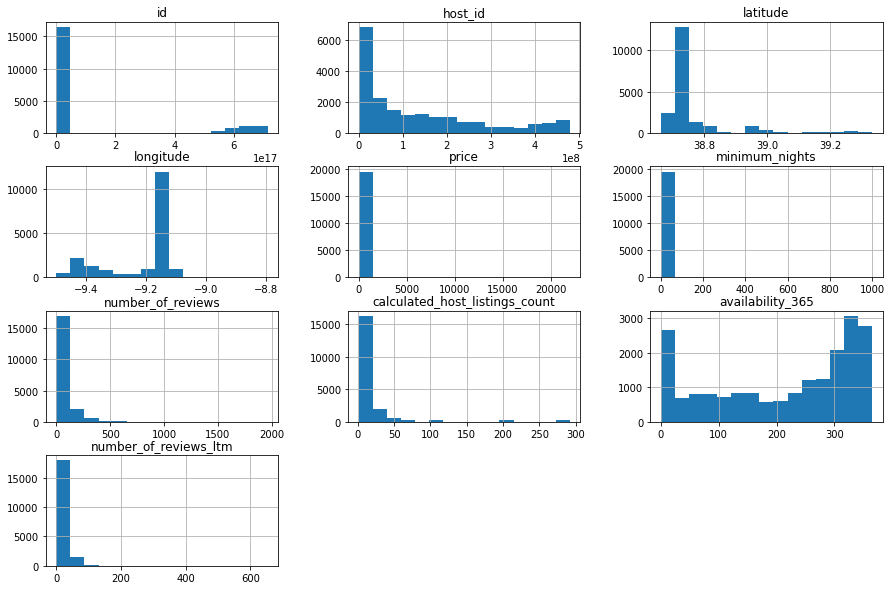

In [9]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

O foco da análise será dado em relação a variáveis **price** e **minimum_nights**.

Utilizando como base o histograma plotado destas variáveis conseguimos notar que elas não seguem uma distribuição e distorcem o histograma, portanto é um grande indicativo de presença de outliers.

Para nos auxiliar, vamos utilizar duas ferramentas para detecção de outliers:
* Resumo estatístico por meio do método **describe()**,
* Análise por meio do **boxplot**.

####Resumo estatístico

In [68]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights']].describe().round(1)

,price,minimum_nights
count,19643.0,19643.0
mean,142.8,4.0
std,298.5,15.5
min,0.0,1.0
25%,69.0,1.0
50%,100.0,2.0
75%,152.0,3.0
max,22000.0,1000.0


Olhando o resumo estatístico, podemos confirmar que existem outliers no *dataset*, devido à:
* O valor máximo da variável **price** destoando bastante em relação ao 152.00 (valor 75%);
* O valor máximo da variável **minimum_nights** destoando bastante em relação ao 3 (valor 75%), além de ser muito maior do que os 365 dias.

Além destes pontos, outra questão chamou bastante atenção, a variável **price** contém dados com o valor 0 (min). Este valor também pode ser considerado como outlier, porque não segue um comportamento normal. Portanto, deve ser retirado do *dataset*.


#### Limpando Outliers

O que são Outliers?

"Os outliers são dados que se diferenciam drasticamente de todos os outros. Em outras palavras, um outlier é um valor que foge da normalidade e que pode (e provavelmente irá) causar anomalias nos resultados obtidos por meio de algoritmos e sistemas de análise."




Para a nossa análise ser mais precisa iremos remover os dados que não condiz com a "realidade".

para tratar os outliers desse conjunto de dados, iremos plotar graficos boxplots e calcular os limites utilizando a regra do IQR Score.

Primeiramente, vamos lembrar o que é o IQR.

O IQR é calculado subtraindo o Terceiro Quartil (75%) pelo Primeiro Quartil (25%). (Conforme analizado no resumo estatístico)

![](https://raw.githubusercontent.com/pedrowillianprestes/sigmoidal_data_science/main/Box_Plot.png)

# IQR = Q3 - Q1

Vamos seguir os seguintes passos:

* Definir o Q1 e Q3 para as variáveis que serão limpas.
* Calcular o IQR para as variáveis.
* Definir o limite superior e inferior para cortar os outliers.
* Remover os outliers.




##### Boxplot para price

In [11]:
# identificando os outliers para a variável price
q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)
IQR_price = q3_price - q1_price
print('IQR da variável price: ', IQR_price)

# definindo os limites                                       
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print('Limite superior de price: ', sup_price)
print('Limite inferior de price: ', inf_price)

IQR da variável price:  83.0
Limite superior de price:  276.5
Limite inferior de price:  -55.5


Aqui podemos ver que, apesar de não termos outliers na parte inferior, continuamos tendo valores iguais a zero (Resumo estatístico), que precisam ser tratados.

Vamos plotar um boxplot para visualizarmos a diferença feita pela limpeza.

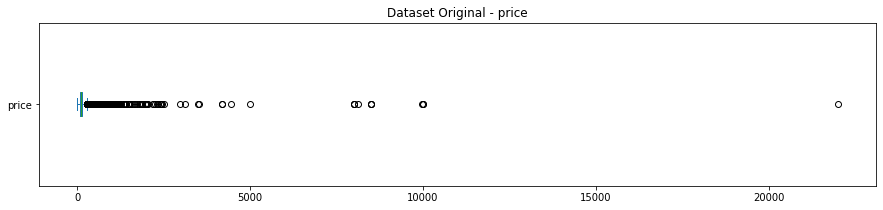

O dataset possui 19643 colunas
1439 Entradas acima de 276.5
Representam 7.33% do dataset


In [12]:
# verificando o conjunto original
fig, ax = plt.subplots(figsize=(15,3))
df.price.plot(kind='box', vert=False);
ax.set_title('Dataset Original - price')
plt.show()
print("O dataset possui {} colunas".format(df.shape[0]))
print("{} Entradas acima de 276.5".format(len(df[df.price > 276.5])))
print("Representam {:.2f}% do dataset".format((len(df[df.price > 276.5]) / df.shape[0])*100))

##### Boxplot para minimum_nights

In [13]:
# identificando os outliers para a variável minimum_nights
q1_minimum_nights = df.minimum_nights.quantile(.25)
q3_minimum_nights = df.minimum_nights.quantile(.75)
IQR_minimum_nights = q3_minimum_nights - q1_minimum_nights
print('IQR da variável minimum_nights: ', IQR_minimum_nights)

# definindo os limites                                       
sup_minimum_nights = q3_minimum_nights + 1.5 * IQR_minimum_nights
inf_minimum_nights = q1_minimum_nights - 1.5 * IQR_minimum_nights

print('Limite superior de minimum_nights: ', sup_minimum_nights)
print('Limite inferior de minimum_nights: ', inf_minimum_nights)

IQR da variável minimum_nights:  2.0
Limite superior de minimum_nights:  6.0
Limite inferior de minimum_nights:  -2.0


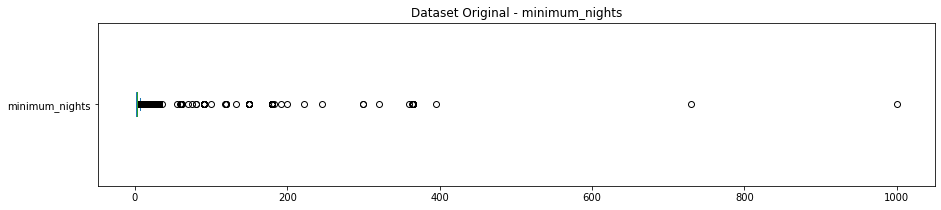

O dataset possui 19643 colunas
1334 Entradas acima de 6
Representam 6.79% do dataset


In [14]:
# verificando o conjunto original
fig, ax = plt.subplots(figsize=(15,3))
df.minimum_nights.plot(kind='box', vert=False);
ax.set_title('Dataset Original - minimum_nights')
plt.show()
print("O dataset possui {} colunas".format(df.shape[0]))
print("{} Entradas acima de 6".format(len(df[df.minimum_nights > 6.0])))
print("Representam {:.2f}% do dataset".format((len(df[df.minimum_nights > 6.0]) / df.shape[0])*100))

In [15]:
# limpando o dataset
df_clean = df.copy()

df_clean.drop(df_clean[df_clean.price > 276.5].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price == 0.0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 6].index, axis=0, inplace=True)

print('Shape antes da limpeza: ', df.shape)
print('Shape após a limpeza: ',df_clean.shape)

Shape antes da limpeza:  (19643, 15)
Shape após a limpeza:  (16970, 15)


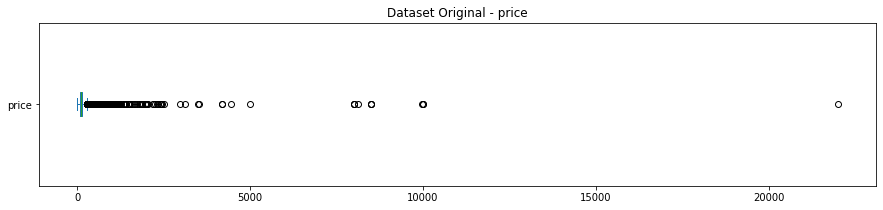

O dataset possui 19643 colunas
1439 Entradas acima de 276.5
Representam 7.33% do dataset


In [16]:
# plotando novamente o boxplot original
fig, ax = plt.subplots(figsize=(15,3))
df.price.plot(kind='box', vert=False);
ax.set_title('Dataset Original - price')
plt.show()
print("O dataset possui {} colunas".format(df.shape[0]))
print("{} Entradas acima de 276.5".format(len(df[df.price > 276.5])))
print("Representam {:.2f}% do dataset".format((len(df[df.price > 276.5]) / df.shape[0])*100))

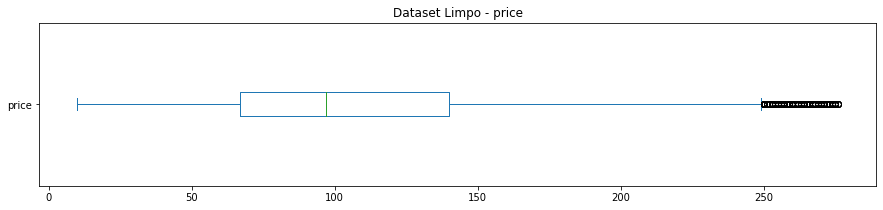

Tamanho original: 19643 colunas
Tamanho atual: 16970 colunas


In [17]:
# verificando o conjunto limpo
fig, ax = plt.subplots(figsize=(15,3))
df_clean.price.plot(kind='box', vert=False);
ax.set_title('Dataset Limpo - price')
plt.show()
print("Tamanho original: {} colunas".format(df.shape[0]))
print("Tamanho atual: {} colunas".format(df_clean.shape[0]))

Aqui podemos ver o resultado da limpeza.

O boxplot mostra alguns dados como outliers, entretanto, esses estão sendo calculados em relação ao novo dataset, e nossa limpeza levou em consideração os quartis do dado original.

Para garantirmos que não estamos lidando com outliers que vão prejudicar nossa análise, vamos checar os histogramas novamente.

#### Histogramas sem *outliers*


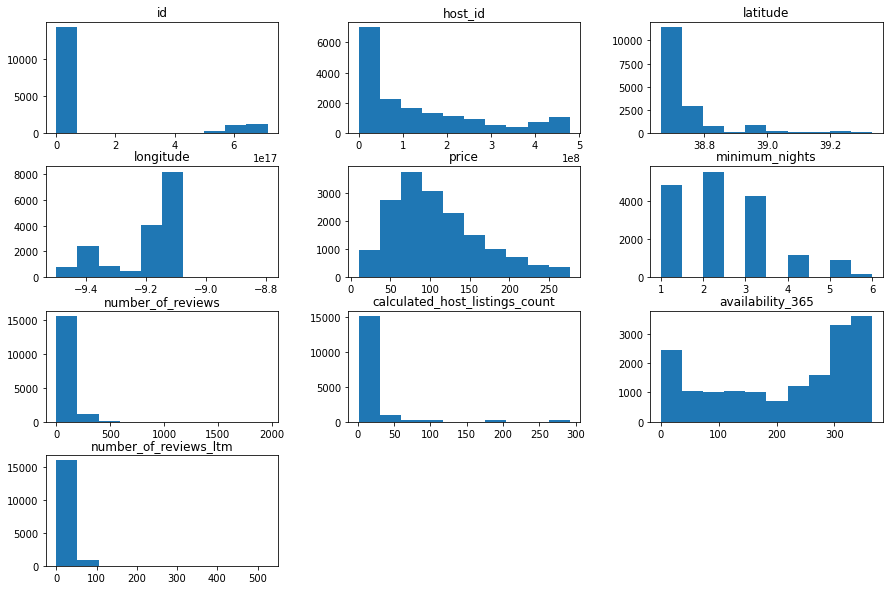

In [19]:
# plotar o histograma para as variáveis numéricas
df_clean.hist(figsize=(15,10), grid=False);


In [20]:
# verificando a distribuição estatística dos dados limpos
df_clean.describe().round(1)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.697000e+04,16970.0,16970.0,16970.0,16970.0,16970.0,16970.0,16970.0,16970.0,16970.0
mean,1.010759e+17,132272037.0,38.8,-9.2,108.1,2.3,59.3,16.6,212.7,15.7
std,2.332733e+17,139781972.7,0.1,0.1,55.6,1.2,84.8,43.5,124.0,19.0
min,6.499000e+03,14455.0,38.7,-9.5,10.0,1.0,0.0,1.0,0.0,0.0
25%,1.695633e+07,17163789.0,38.7,-9.3,67.0,1.0,6.0,1.0,102.0,2.0
50%,2.984577e+07,76127721.0,38.7,-9.1,97.0,2.0,24.0,4.0,256.0,9.0
75%,4.933469e+07,208933060.0,38.7,-9.1,140.0,3.0,77.0,12.0,323.0,23.0
max,7.144341e+17,478855996.0,39.3,-8.8,276.0,6.0,1961.0,292.0,365.0,525.0


Analisando novamente o resumo estatístico acima, temos os dados mais condizentes com a realidade.

In [26]:
# ver a média da coluna `price``

print('O preço médio é de {} Euros'.format(df_clean.price.mean().round(2)))
print('A mediana do preço é {} Euros'.format(df_clean.price.median()))
print('A moda do preço é {} Euros'.format(df_clean.price.mode()[0]))

O preço médio é de 108.12 Euros
A mediana do preço é 97.0 Euros
A moda do preço é 80 Euros


### **Q5. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [27]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
price,1.000000,0.022871,-0.064109,0.138568,0.131316
minimum_nights,0.022871,1.000000,-0.006526,-0.174342,-0.130159
number_of_reviews,-0.064109,-0.006526,1.000000,-0.093085,-0.000494
calculated_host_listings_count,0.138568,-0.174342,-0.093085,1.000000,0.065948
availability_365,0.131316,-0.130159,-0.000494,0.065948,1.000000


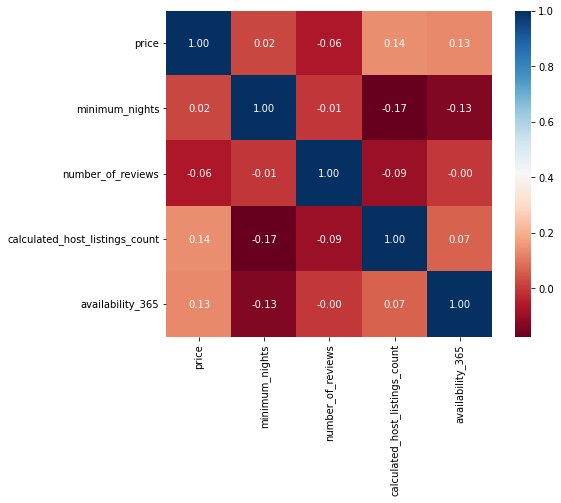

In [28]:
# plotar um heatmap a partir das correlações
fig= plt.figure(figsize=(8,6))
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**
A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já utilizou-se do serviço, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [29]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    12963
Private room        3588
Shared room          221
Hotel room           198
Name: room_type, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


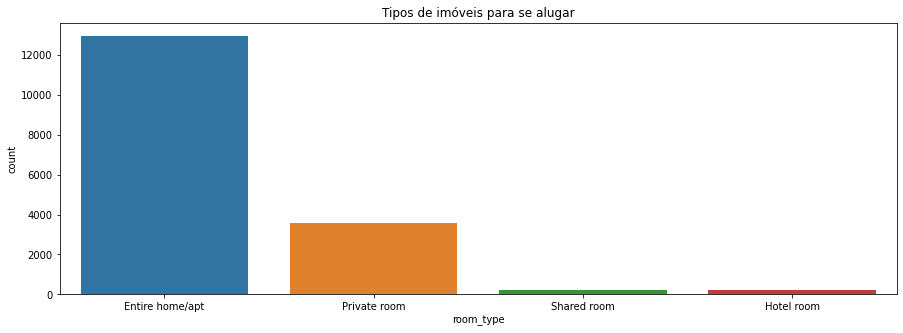

In [95]:
#gráfico representando por tipo de imóvel
plt.figure(figsize=(15,5))
sns.countplot(df_clean['room_type'])
plt.title('Tipos de imóveis para se alugar');

In [94]:
# mostrar a porcentagem de cada tipo de imóvel disponível
a = (df_clean.room_type.value_counts() / df_clean.shape[0])
df_clean_a = pd.DataFrame(a)
df_clean_a.style.format('{:.2%}')

,room_type
Entire home/apt,76.39%
Private room,21.14%
Shared room,1.30%
Hotel room,1.17%


A saída do comando nos mostra a porcetagem dos imóveis, em que:

**76%** casa ou apartamento;

**21%** quartos individuais;

**0.1%** quartos compartilhados;

o restante dos imóveis são quartos de hotéis.



O imóvel do tipo apartamento/casa (Entire home/apt) é o mais ofertado no Airbnb para a cidade de Lisboa, representando cerca de 76% das propriedades do dataset.

O segundo tipo de imóvel mais ofertado é o quarto privativo (Private room), representando cerca de 21%.

### **Q7. Qual a localidade mais cara do dataset?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

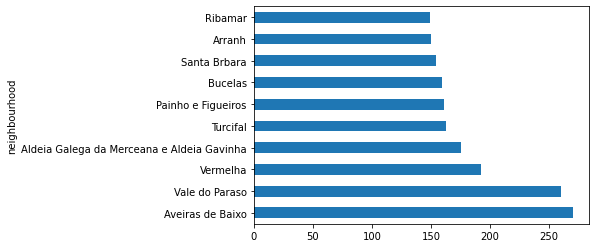

In [108]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10].plot(kind='barh');

Acima, vemos que o bairro de Aveiras de Baixo e Vale do Paraso está com média de preço superior ao de outras regiões, porém possuem apenas 1 entrada cada.

Uma pessoa que não conhecesse Lisboa poderia apresentar esses resultados sem se questionar.
Só para dar um único exemplo de como uma amostra pode ser não-representativa, veja quantas entradas há para Aveiras de Baixo, Vale do Paraso e Vermelha:

In [63]:
# definindo variáveis para ver a quantidade de imóveis de cada região

avb = df_clean[df_clean.neighbourhood == 'Aveiras de Baixo'].shape[0]

vap = df_clean[df_clean.neighbourhood == 'Vale do Paraso'].shape[0]

ver = df_clean[df_clean.neighbourhood == 'Vermelha'].shape[0]

agm = df_clean[df_clean.neighbourhood == 'Aldeia Galega da Merceana e Aldeia Gavinha'].shape[0]

tur = df_clean[df_clean.neighbourhood == 'Turcifal'].shape[0]

# Imprimindo o número de imóveis em cada região
print('O número de imóveis em Aveiras de Baixo é :\t {}'.format(avb))

print('O número de imóveis em Dn Vale do Paraso é :\t {}'.format(vap))

print('O número de imóveis em Vermelha é :      \t {}'.format(ver))

print('O número de imóveis em Aldeia Galega é :\t {}'.format(agm))

print('O número de imóveis em Turcifal é :      \t {}'.format(tur))

O número de imóveis em Aveiras de Baixo é :	 1
O número de imóveis em Dn Vale do Paraso é :	 1
O número de imóveis em Vermelha é :      	 4
O número de imóveis em Aldeia Galega é :	 3
O número de imóveis em Turcifal é :      	 5


In [64]:
#quantidade de imóveis por bairro
df_clean.neighbourhood.value_counts()

Santa Maria Maior     2827
Misericrdia           2097
Arroios               1502
Cascais e Estoril     1068
So Vicente             948
                      ... 
Vale do Paraso           1
Aveiras de Baixo         1
Painho e Figueiros       1
Alcoentre                1
Alguber                  1
Name: neighbourhood, Length: 126, dtype: int64

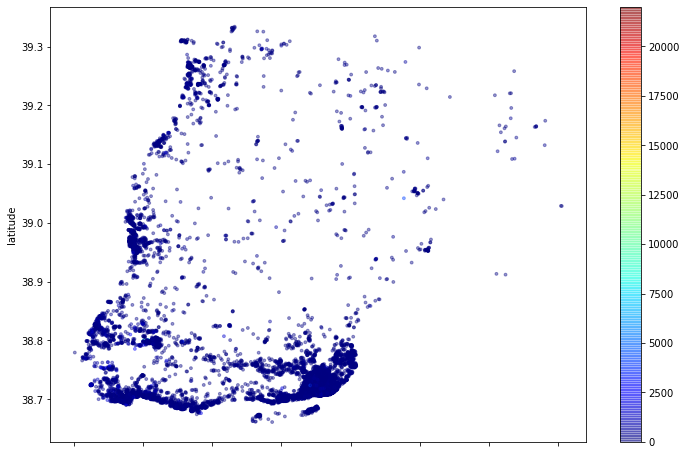

In [61]:
# plotar os imóveis pela latitude-longitude
df.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

Por fim, vamos avaliar a média de noites em Lisboa.

In [62]:
# ver a média da coluna `minimum_nights``
print("A média do mínimo de noites é aproximadamente",round(df_clean['minimum_nights'].mean(),0))

A média do mínimo de noites é aproximadamente 2.0


A média de noites é de aproximadamente 2 dias.

## Conclusões


Foi feita apenas uma análise superficial na base de dados do Airbnb versão resumida, porém já se percebeu que existem *outliers* em algumas das variáveis. É recomendado utilizar o dataset mais completo para obter uma análise com maior precisão. 

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Após a fase de tratamento de dados, foi possível concluir que o aluguel de um imóvel custa em média 108 euros e de noites para reservar a propriedade é de 2 dias. Tipo de imóvel mais ofertado é do tipo apartamento/casa.

Além disso, com a finalidade de conhecer os 10 bairros mais caros em Lisboa, tivemos uma certa dificuldade a respeito dos dados. Apesar do tratamento realizado, alguns bairros ainda possuíam poucos eventos, podendo trazer uma falsa compreensão a respeito desta informação. 